<a href="https://colab.research.google.com/github/ChethanaReddy28/AIML_Projects_and_Labs/blob/main/Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [4]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    53
Heads    47
Name: count, dtype: int64


In [6]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [7]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [8]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

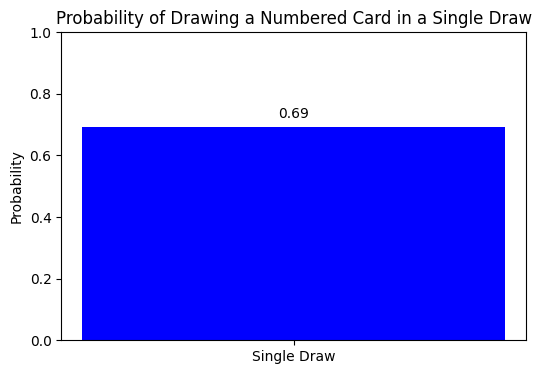

In [9]:
import matplotlib.pyplot as plt

# Number of numbered cards (2 to 10)
numbered_cards = 36
# Total number of cards in the deck
total_cards = 52

# Probability of drawing a numbered card
probability_numbered_card = numbered_cards / total_cards

# Plotting the probability
plt.figure(figsize=(6, 4))
plt.bar(['Single Draw'], [probability_numbered_card], color='blue')
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Probability of Drawing a Numbered Card in a Single Draw')
plt.text(0, probability_numbered_card + 0.02, f'{probability_numbered_card:.2f}', ha='center', va='bottom')

plt.show()


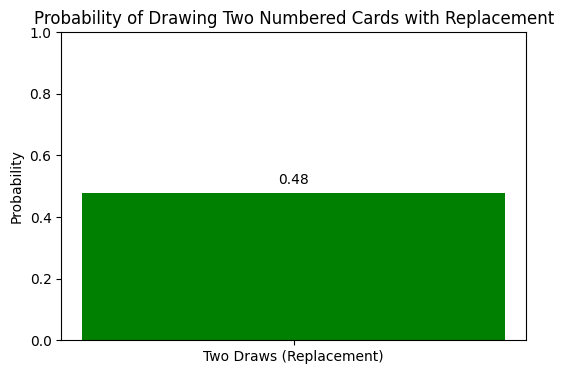

In [10]:
# Probability of drawing a numbered card each time
probability_each_draw = numbered_cards / total_cards

# Probability of drawing two numbered cards with replacement
probability_two_draws_with_replacement = probability_each_draw ** 2

# Plotting the probability
plt.figure(figsize=(6, 4))
plt.bar(['Two Draws (Replacement)'], [probability_two_draws_with_replacement], color='green')
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Probability of Drawing Two Numbered Cards with Replacement')
plt.text(0, probability_two_draws_with_replacement + 0.02, f'{probability_two_draws_with_replacement:.2f}', ha='center', va='bottom')

plt.show()


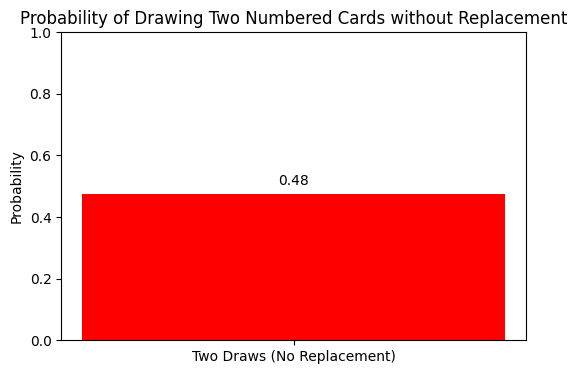

In [11]:
# After drawing one numbered card, there are now 35 numbered cards left and 51 cards in total
remaining_numbered_cards = numbered_cards - 1
remaining_total_cards = total_cards - 1

# Probability of drawing a numbered card first
probability_first_draw = numbered_cards / total_cards

# Probability of drawing a second numbered card without replacement
probability_second_draw = remaining_numbered_cards / remaining_total_cards

# Combined probability of both events happening
probability_two_draws_without_replacement = probability_first_draw * probability_second_draw

# Plotting the probability
plt.figure(figsize=(6, 4))
plt.bar(['Two Draws (No Replacement)'], [probability_two_draws_without_replacement], color='red')
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Probability of Drawing Two Numbered Cards without Replacement')
plt.text(0, probability_two_draws_without_replacement + 0.02, f'{probability_two_draws_without_replacement:.2f}', ha='center', va='bottom')

plt.show()


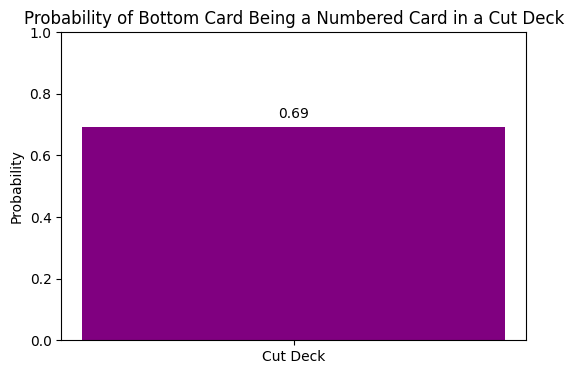

In [12]:
# Probability of the bottom card of the top part of the cut being a numbered card
probability_cut_bottom_numbered = numbered_cards / total_cards

# Plotting the probability
plt.figure(figsize=(6, 4))
plt.bar(['Cut Deck'], [probability_cut_bottom_numbered], color='purple')
plt.ylim(0, 1)
plt.ylabel('Probability')
plt.title('Probability of Bottom Card Being a Numbered Card in a Cut Deck')
plt.text(0, probability_cut_bottom_numbered + 0.02, f'{probability_cut_bottom_numbered:.2f}', ha='center', va='bottom')

plt.show()


In [13]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

3 cards were thrown: JH 4C 5C AH
12 cards were thrown: 9C KH 4S 3C 9H 4D 9S QC 10H QD 3D KS AH
21 cards were thrown: 9S QH 7C 4D 5H KH KC 3S 8S 6S JS 5C 4H 6D 4S 4C 10S 5S 7S QS JH AH
3 cards were thrown: 8S 2D 6C AC
8 cards were thrown: KD 9S 4D 4S 9H 3D JH QD AH
8 cards were thrown: 3D QC KC 8D 9S 6D 10S 9D AS
2 cards were thrown: 2H 10C AS
19 cards were thrown: 9S 2H JC 3H 5C 9H 6D 2S QD 8S 7H QH 5S 8C 4C 10C 7D 4H 10H AH
8 cards were thrown: 2H 3D JS 7S 9H KH 9S 2S AD
17 cards were thrown: 4S 8D 3C 4C QD QS 3D 10C JH 9C 9S 9D KS 5C 4H 4D 7D AH

9.6124 cards are tossed before we see the first ace!


In [14]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

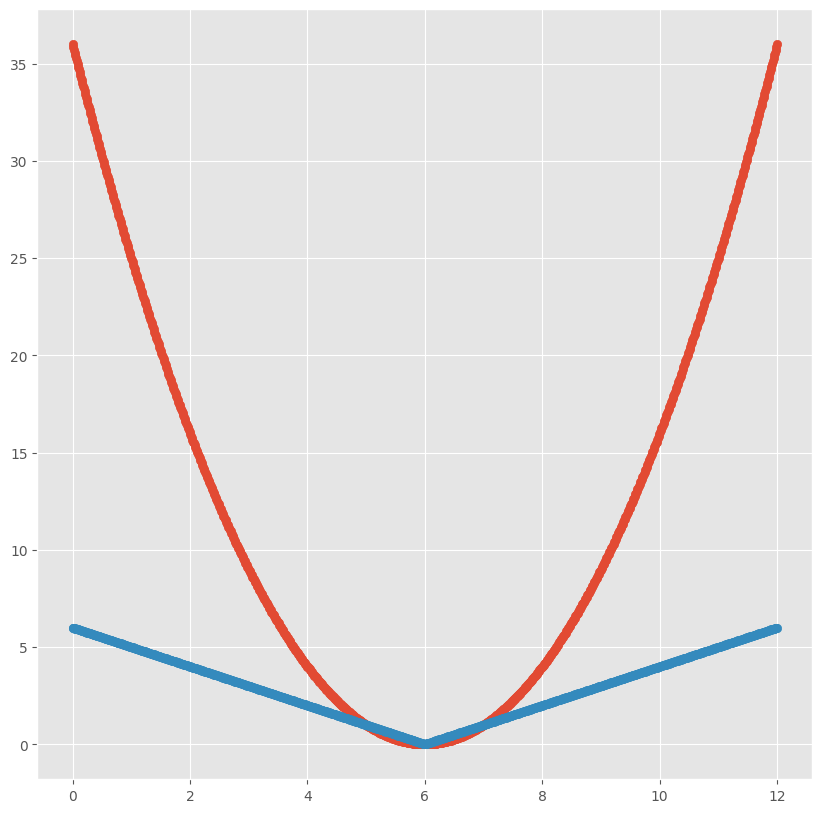

In [15]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

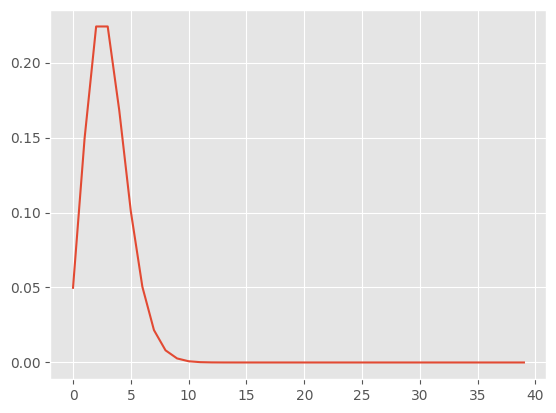

In [18]:
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([  2.,   6.,  31.,  45.,  90., 116.,  62.,  34.,  10.,   4.]),
 array([1.75 , 1.995, 2.24 , 2.485, 2.73 , 2.975, 3.22 , 3.465, 3.71 ,
        3.955, 4.2  ]),
 <BarContainer object of 10 artists>)

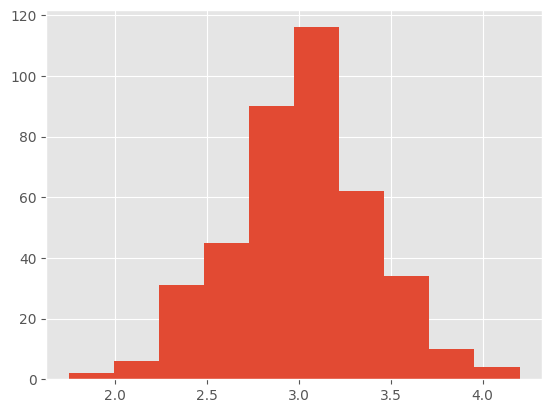

In [19]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

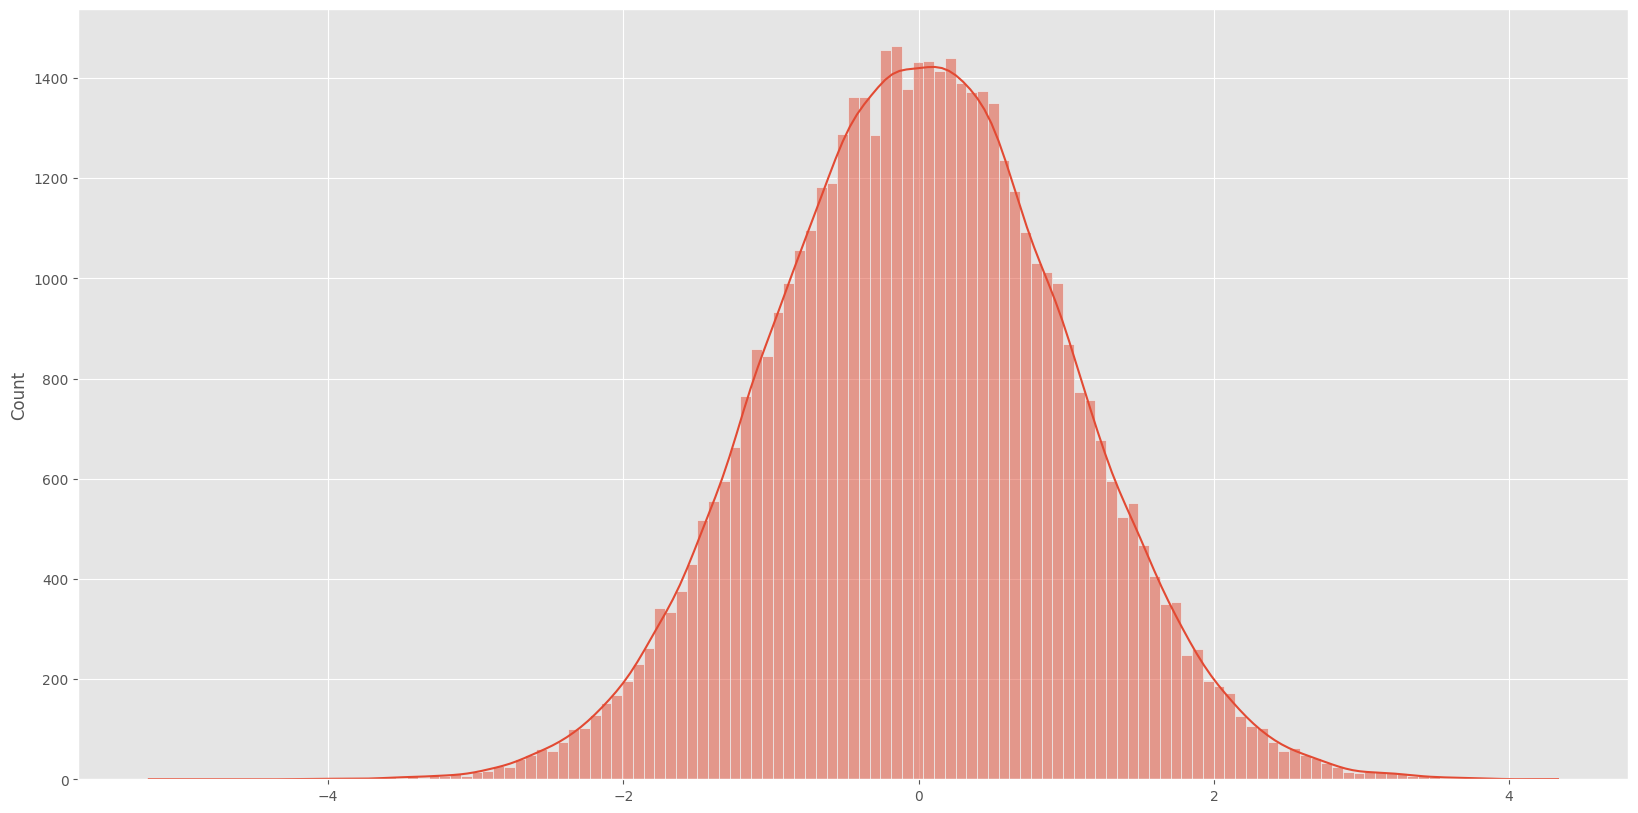

In [20]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

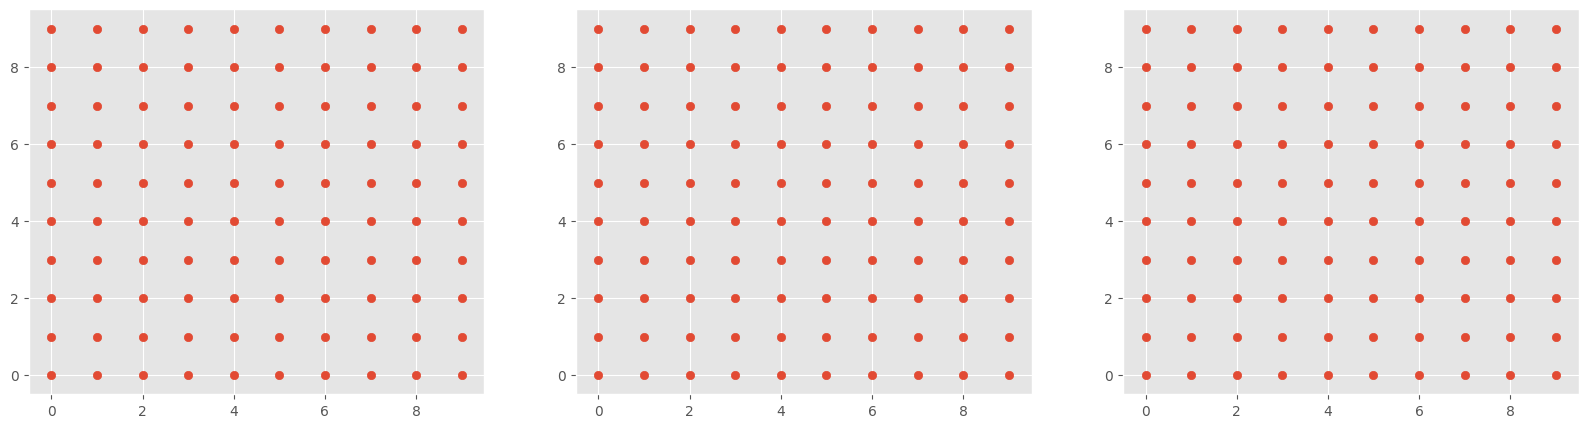

In [21]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

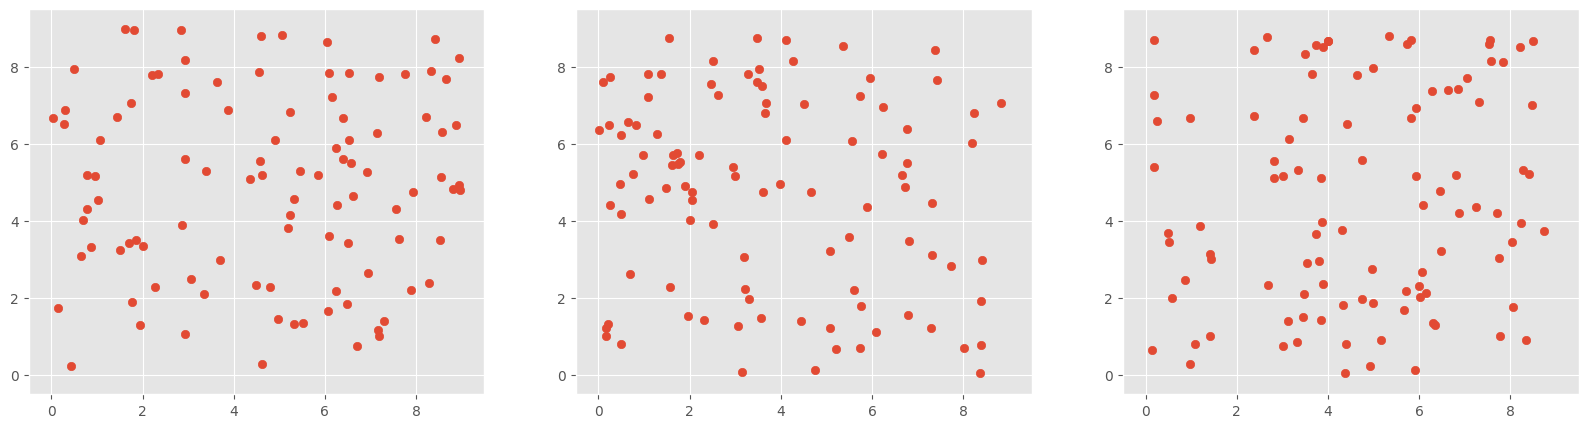

In [22]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

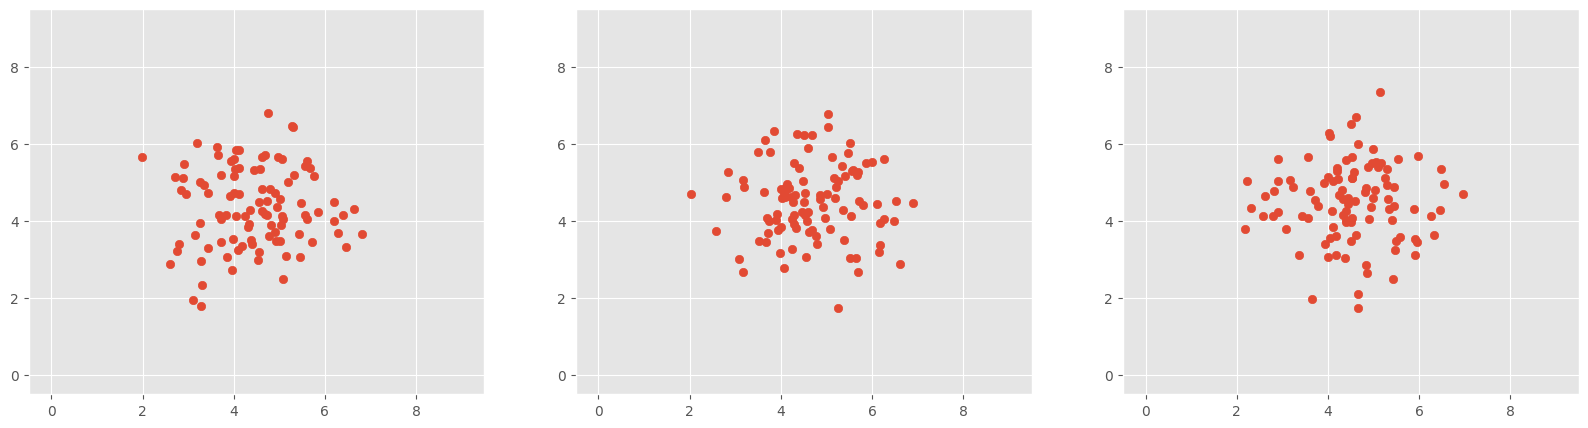

In [23]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()